# This notebook explains how to build a Linear Regression Model 
    - Age_heigh_weight_gener dataset is used here
    - Problem statement : 
        Build a Linear Regression Model to predict the weight of person
    

In [2]:
%matplotlib inline 
import pandas as pd 
import numpy as np
from math import sqrt

# Visualization Modules
import matplotlib
from matplotlib import pyplot as plt

#Scipy Maths Models
import statsmodels.api as sm
from scipy import stats

# Machine Learning Training Modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Loading Dataset 

In [3]:
data_file = 'height_weight_dataset.csv' # make sure the path of the file is correct
df = pd.read_csv(data_file)
df.head()

,Gender,Age,Height,Weight
0,f,143,56.3,85.0
1,f,191,62.5,112.5
2,f,160,62.0,94.5
3,f,157,64.5,123.5
4,f,191,65.3,107.0


# Data Insight

In [4]:
df.describe() # shows summary of complete dataset , Note: Categorical data cannot be summarized

,Age,Height,Weight
count,237.000000,237.000000,237.000000
mean,164.430380,61.364557,101.308017
std,18.425767,3.945402,19.440698
min,139.000000,50.500000,50.500000
25%,148.000000,58.800000,85.000000
50%,163.000000,61.500000,101.000000
75%,178.000000,64.300000,112.000000
max,250.000000,72.000000,171.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5676d5ac8>,
      dtype=object)

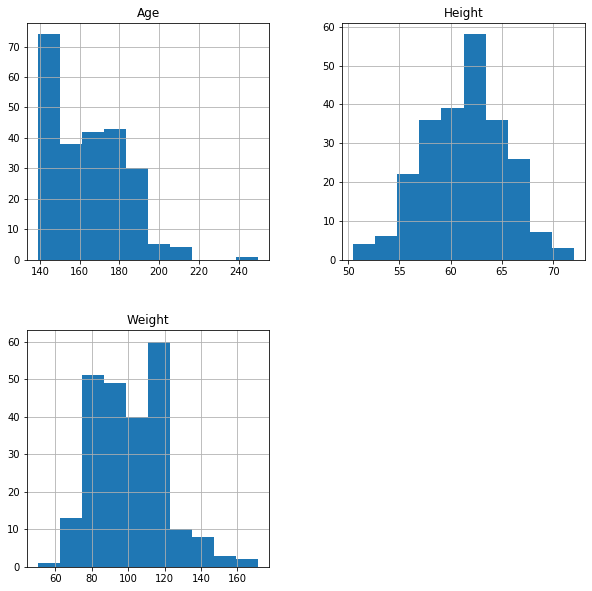

In [7]:
df.hist(figsize=(10,10)) # Helps to see the distribution of each feature using histogram 

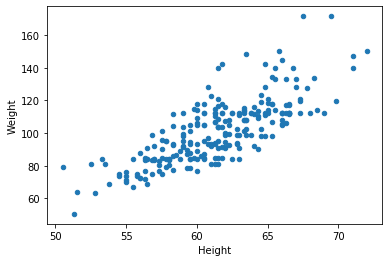

In [8]:
df.plot(x='Height', y='Weight', kind='scatter')

In [9]:
df.corr() # Shows the correlation between two variables

,Age,Height,Weight
Age,1.000000,0.648857,0.634636
Height,0.648857,1.000000,0.774876
Weight,0.634636,0.774876,1.000000


# Model Training and Evaluation

Co-Efficient value : [3.76236711]
Y-intercept : -129.63381218647882
Model Score : 0.6338172499056638
Mean Squared Error : 168.88363533031884
Root Mean Squared Error : 12.995523665105567
Rsquare : 0.6338172499056638


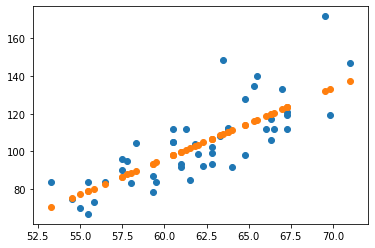

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df[['Height']], df['Weight'], test_size=0.20, shuffle=True) 

# Try using Age as a Feature also during training also (MultiLinear Regression)
# When Shuffle = True data set is shuffled so u see different results for every fit
# to use same dataset for every fit use random_state value 

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
co_efficient = lr_reg.coef_
intercept = lr_reg.intercept_
score = lr_reg.score(X_test, y_test)

# print(X_test.head())
print("Co-Efficient value :", co_efficient)
print("Y-intercept :", intercept)
print("Model Score :", score)


y_pred = lr_reg.predict(X_test)
MSE = mse(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", MSE)
print("Root Mean Squared Error :", sqrt(MSE))
print("Rsquare :", R2)



plt.scatter(x=X_test.Height, y=y_test)
plt.scatter(x=X_test.Height, y=y_pred)
plt.show()

### Points to Poder :
    - It is very important that dataset is shuffled well to avoid any element of bias/patterns in the split datasets before training the ML model.
    - You can use math.sqrt(MSE) to get the RMSE value 

In [ ]:
# P value 
X1 = X_train.Height.values#sm.add_constant(X_train.Height.values)
y1 = y_train.values

lin_reg = sm.OLS(X1, y1).fit()
lin_reg.summary()

the ideal MSE isn't 0, since then you would have a model that perfectly predicts your training data, but which is very unlikely to perfectly predict any other data. What you want is a balance between overfit (very low MSE for training data) and underfit (very high MSE for test/validation/unseen data). It looks like you are currently overfitting slightly (because training MSE is lower than validation MSE), but the R2 isn't much lower, so - unless you really need to explore the tradeoff - your model should be useful to predict data that you haven't yet seen.